<a href="https://colab.research.google.com/github/TomasManuelObregon/Python/blob/Labo2/clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importo las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

j = complex(0,1)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Defino una funcion y los datos para poder hacer los ajustes
def lin(x,m, b):
  y = m*x + b  
  return y

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Defino una funcion para calcular las ondas
def phi(A, f):
  y = A * (np.exp(j * f))
  return y

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Funcion pa leer datos
def leer_datos(datos):
  data = np.loadtxt(datos, skiprows=1, delimiter=';')

  amplitud      = data[:,0]
  err_amplitud  = data[:,1]
  fase          = data[:,2]
  err_fase      = data[:,3]

  return amplitud, err_amplitud, fase, err_fase

# defino las distancias 
dist_interferencia = np.arange(0, 116, 5)


### --Velocidad del Sonido--

In [ ]:
velocidad = np.loadtxt('vel_sonido.csv', skiprows=1, delimiter=';')

dist_vel      = velocidad[:,0]
t_vel         = velocidad[:,1]
err_dist_vel  = velocidad[:,2]

# Ajuste
popt, pcov = op.curve_fit(lin, t_vel, dist_vel, sigma=err_dist_vel, absolute_sigma = True)
pend_vel     = popt[0]
ord_vel      = popt[1]
err_pend_vel = pcov[0][0]

dom_vel = np.linspace(min(t_vel), max(t_vel), 1000)
im_vel  = lin(dom_vel, pend_vel, ord_vel)

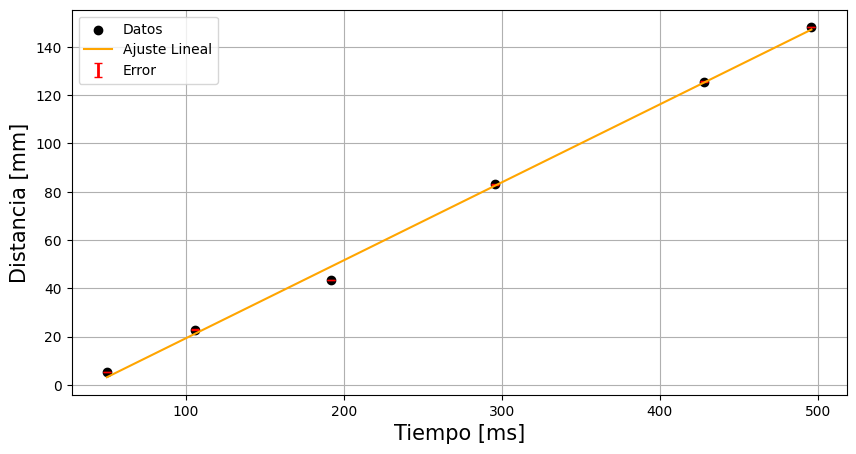

Pendiente: 0.322779826 ± 3e-09

La tomo como 0.323


In [ ]:
plt.figure(figsize=[10,5])

plt.scatter(t_vel, dist_vel, c='black', marker='o', label='Datos')
plt.errorbar(t_vel, dist_vel, yerr= err_dist_vel, linewidth= 0, elinewidth= 2, capsize = 3, c='red', label= 'Error')
plt.plot(dom_vel, im_vel, c='orange', label='Ajuste Lineal')

plt.xlabel('Tiempo [ms]', fontsize=15)
plt.ylabel('Distancia [mm]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

print(f'Pendiente: {np.round(pend_vel, decimals=9)} ± {np.round(err_pend_vel, decimals=9)}')
print(f'\nLa tomo como {np.round(pend_vel, decimals=3)}')# ==> paso a km/h (divido por 10mm/36ms) ==> ')

### --Interferencia--

In [ ]:
# Defino las variables
amp_a, err_amp_a, fase_a, err_fase_a = leer_datos('A.csv')
amp_b, err_amp_b, fase_b, err_fase_b = leer_datos('B.csv')
amp_int, err_amp_int, fase_int, err_fase_int = leer_datos('AmasB.csv')

onda_a     = phi(amp_a, fase_a)
onda_b     = phi(amp_b, fase_b)
onda_int   = phi(amp_int, fase_int)

# Defino la onda suma, que deberia ser igual que onda_int
onda_amasb = onda_a + onda_b

# Tomo parte REAL de las ondas complejas
onda_int   = np.real(onda_int)
onda_amasb = np.real(onda_amasb)

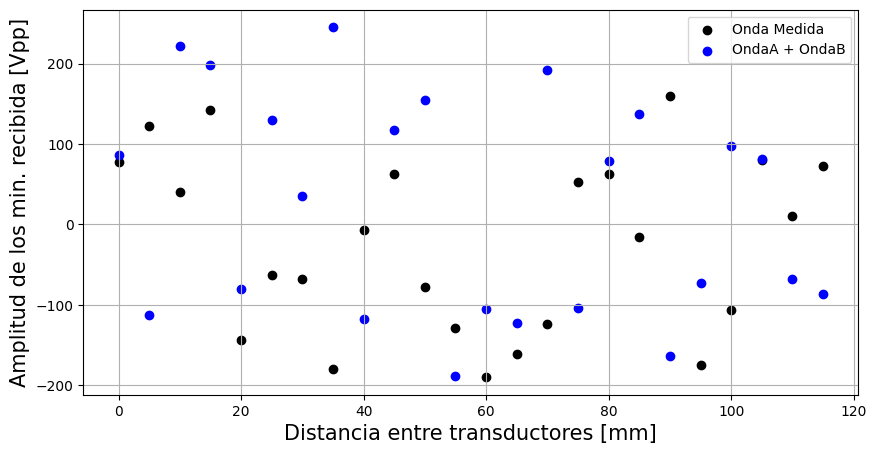

In [67]:
plt.figure(figsize=[10,5])

plt.scatter(dist_interferencia, onda_int, c='black', marker='o', label='Onda Medida')
plt.scatter(dist_interferencia, onda_amasb, c='blue', marker='o', label='OndaA + OndaB')


plt.xlabel('Distancia entre transductores [mm]', fontsize=15)
plt.ylabel('Amplitud de los min. recibida [Vpp]', fontsize=15)
plt.legend()
plt.grid()
plt.show()
